(80, 2)


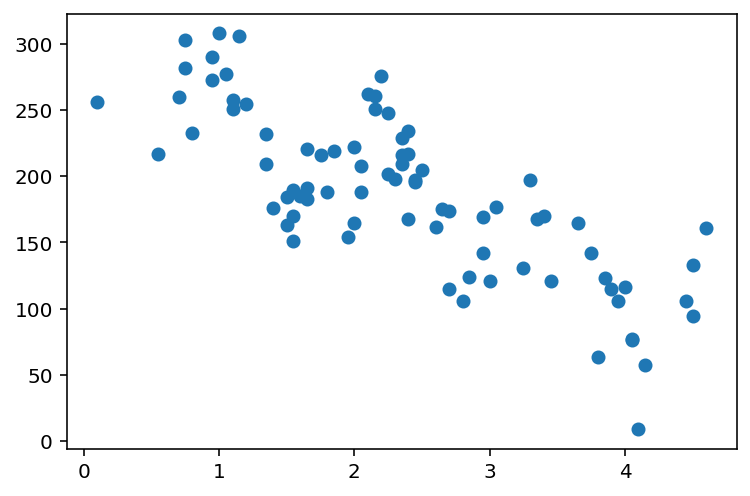

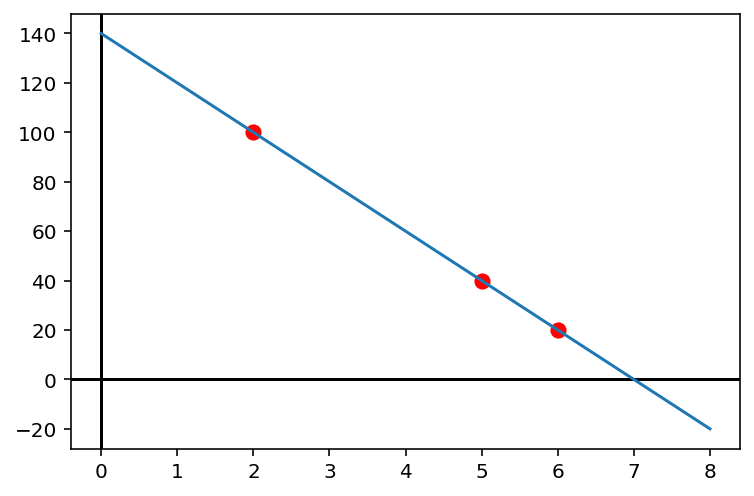

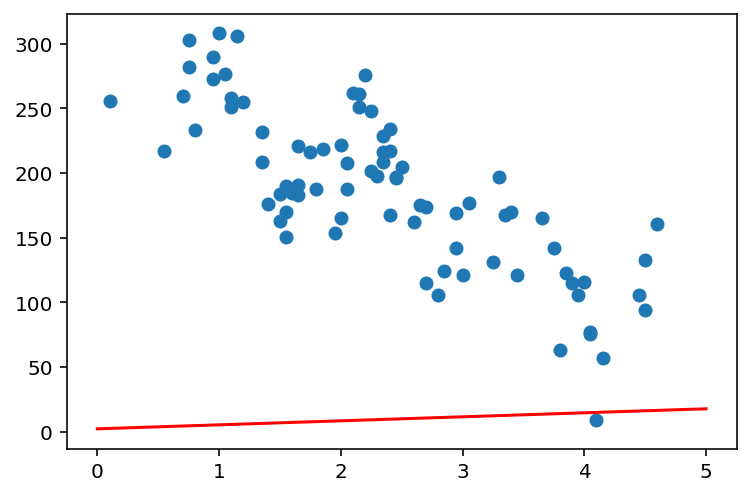

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


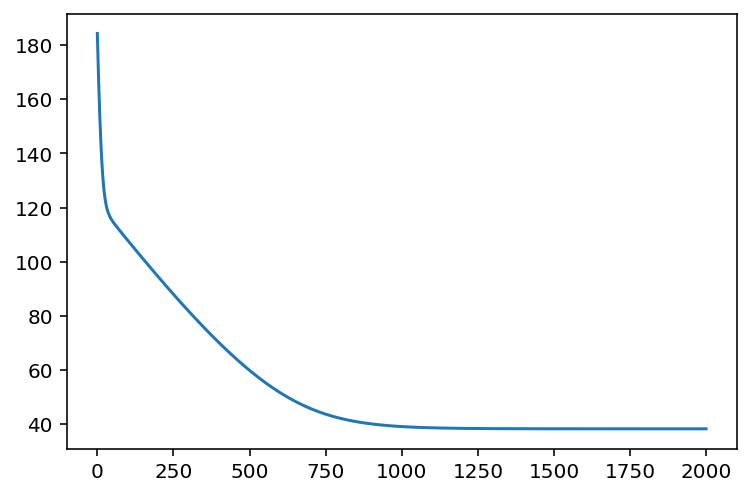

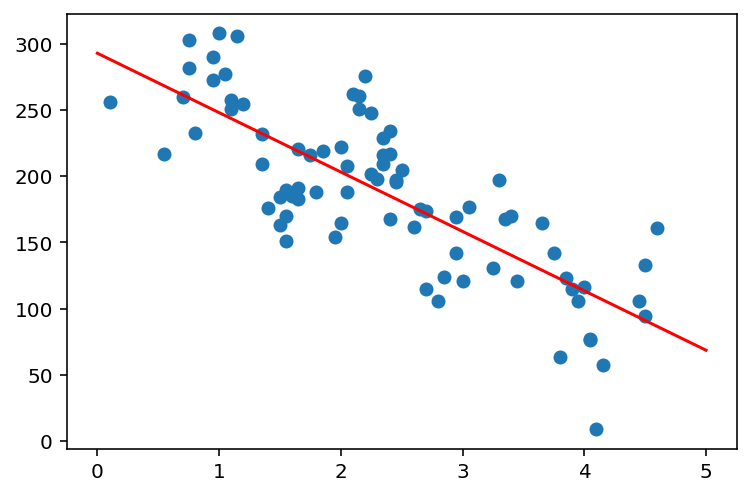

In [10]:
from IPython.display import display, Image

import pandas as pd

macbook = pd.read_csv('~/aiffel/bike_regression/data/macbook.csv')
print(macbook.shape)
macbook.head()

import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

# x, y축
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

import numpy as np

# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])

# 값들만 x,y에 array로 담아온다. 
x = macbook["used_years"].values
y = macbook["price"].values

#
# 일차 방정식 : y = x*기울기 + 절편
#
def model(x, w, b):
    y = w * x + b
    return y

def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

# η(학습율을 0.0001로 지정했을 때)
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

# 초기 가중치 (임의값)
w=3.1
b=2.3


# w=-20, b=140
# (2,100), (5,40), (6,20)

# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)
plt.show()

#
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

x = macbook["used_years"].values
y = macbook["price"].values
prediction = model(x, w, b) # y = 3.1x + 2.3

# 데이타에 prediction 열 추가
macbook['prediction'] = prediction

# prediction과  price(y)의 차이를 error 열에 추가
macbook['error'] = macbook['price'] - macbook['prediction']

rmse = RMSE(prediction, y)


# 초기 가중치 (임의값)
w=3.1
b=2.3
# 손실함수값 저장하는 빈 리스트
losses = []
LEARNING_RATE = 1

for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

plt.plot(losses)
plt.show()

w,b

# 모델에 넣을 x 값들 준비 (start, stop, num)
# 0년 ~ 5년, 6개의 sample
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

(20, 2)


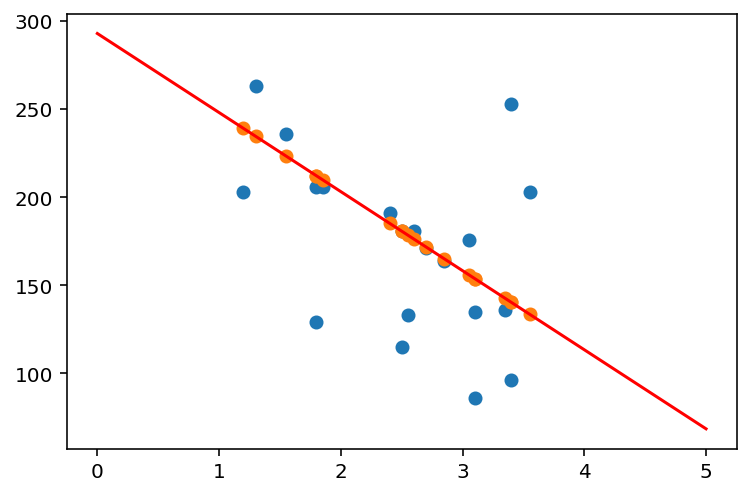

In [11]:
from IPython.display import display, Image

import pandas as pd

test = pd.read_csv("~/aiffel/bike_regression/data/macbook_test.csv")
print(test.shape)
test.head()

import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.




#
# 일차 방정식 : y = x*기울기 + 절편
#
def model(x, w, b):
    y = w * x + b
    return y

def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

# η(학습율을 0.0001로 지정했을 때)
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db


# 초기 가중치 (임의값)
w=-44.92
b=293.08




test_x = test['used_years'].values
test_y = test['price'].values
prediction = model(test_x, w, b) # y = 3.1x + 2.3

# 데이타에 prediction 열 추가
test['prediction'] = prediction
test['error'] = test['price'] - test['prediction']


rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

# 모델에 넣을 x 값들 준비 (start, stop, num)
# 0년 ~ 5년, 6개의 sample
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

(244, 7)
(195, 12) (195,)
(49, 12) (49,)
dW: [318.57700559  39.40039398   9.07819476   5.00154818   5.21539644
   8.8643465    3.30875803   0.91923292   5.19784547   4.65390653
   3.50246697  10.57727597]
db: 14.079742939554606
Iteration 10 : Loss 8.8034
Iteration 20 : Loss 2.8682
Iteration 30 : Loss 2.1257
Iteration 40 : Loss 2.0302
Iteration 50 : Loss 2.0153
Iteration 60 : Loss 2.0104
Iteration 70 : Loss 2.0069
Iteration 80 : Loss 2.0035
Iteration 90 : Loss 2.0001
Iteration 100 : Loss 1.9968
Iteration 110 : Loss 1.9935
Iteration 120 : Loss 1.9902
Iteration 130 : Loss 1.9869
Iteration 140 : Loss 1.9836
Iteration 150 : Loss 1.9803
Iteration 160 : Loss 1.9770
Iteration 170 : Loss 1.9738
Iteration 180 : Loss 1.9706
Iteration 190 : Loss 1.9674
Iteration 200 : Loss 1.9642
Iteration 210 : Loss 1.9610
Iteration 220 : Loss 1.9578
Iteration 230 : Loss 1.9546
Iteration 240 : Loss 1.9515
Iteration 250 : Loss 1.9483
Iteration 260 : Loss 1.9452
Iteration 270 : Loss 1.9421
Iteration 280 : Loss 1.93

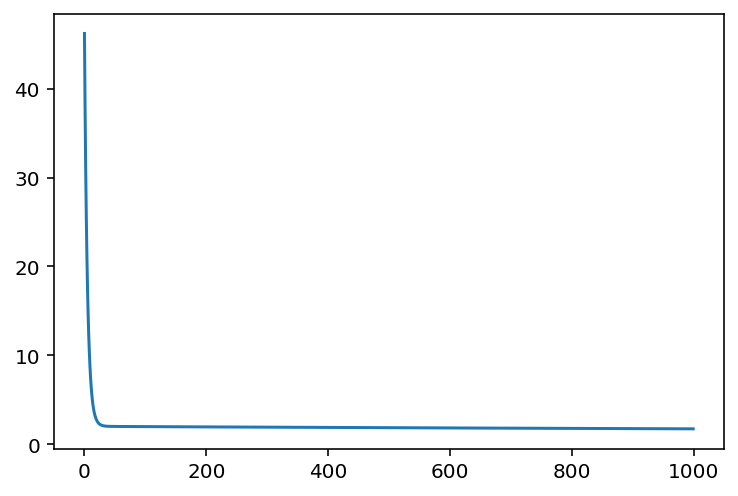

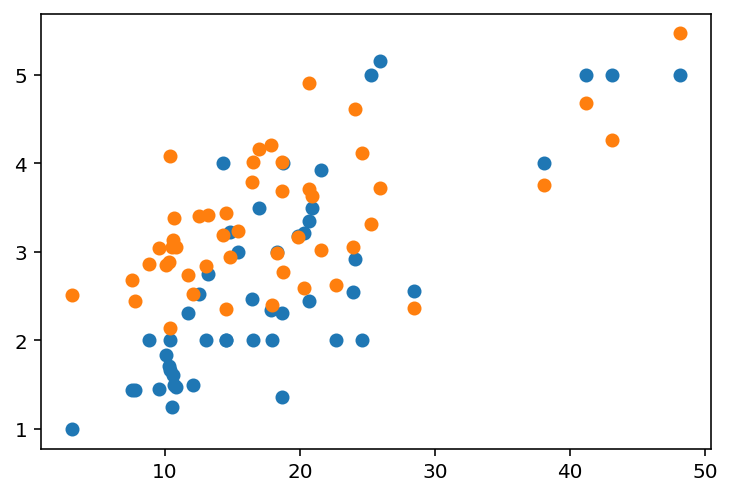

In [20]:
import seaborn as sns

sns.get_dataset_names()

tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

# 원-핫 인코딩(One Hot Encoding)
# 더미 변수로 변경
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

# tips 컬럼을 맨 오른쪽으로 위치 변경 (tips <== y)
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

#y=wx + b
# 다변수 일차방정식, 선형방정식
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# random한 W(w1 ~ w12), b 생성하기
import numpy as np
W = np.random.rand(12)
b = np.random.rand()

# y=wx + b
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

LEARNING_RATE = 0.0001
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

W,b

# Test 데이타
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse


plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()


(244, 13)


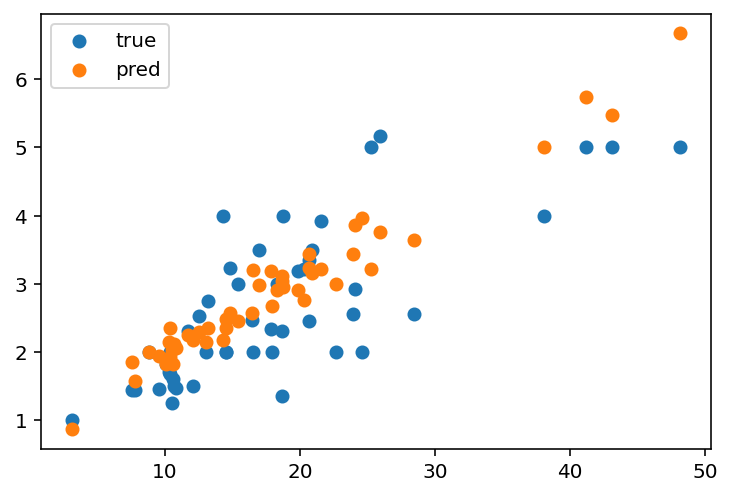

In [24]:
import seaborn as sns

sns.get_dataset_names()

tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
print(tips.shape)
tips.head()

X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()